# Heart-Failure-Patient Mortality Predictor

## Description

### Objective

`Make a Classification Model using Random Forest and AdaBoost to predict DEATH_EVENT on patients.`

### Problem Statement
`1. What are columns that able to affect the DEATH EVENT significantly ?`
<br>
`2. What is the best model so far ?`
<br>
`3. How much data is wrongly predicted ?`
<br>
`4. How to improve the model prediction ?`

## Working Area
### 1. Import Libraries

In [145]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# Outliers handling
from feature_engine.outliers import Winsorizer

# Features selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Numerical features scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score

# Ignore the warning notes
import warnings
warnings.filterwarnings("ignore")

### 2. Data Loading
Extracting dataset from ftds-hacktiv8-project, with dataset phase1_ftds_016_rmt and table name heart-failure using following command to obtain the dataset.
<br>
SELECT *
<br>
FROM `ftds-hacktiv8-project.phase1_ftds_016_rmt.heart-failure`
<br>
and save is as 'h8dsft_P1G3_rivaldo_jasper` with csv format.

In [146]:
# Import csv file to dataframe
df = pd.read_csv('h8dsft_P1G3_rivaldo_jasper.csv')

# Show dataframe head
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [147]:
# Show dataframe tail
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Description<br>
age : age in years<br>
anaemia : 0 = no, 1 = yes<br>
creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)<br>
diabetes : 0 = no, 1 = yes<br>
ejection_fraction : Percentage of blood leaving the heart at each contraction<br>
high_blood_pressure : 0 = no, 1 =yes<br>
platelets : Platelets in the blood (kiloplatelets/mL)<br>
serum_creatinine : Level of serum sodium in the blood (mEq/L)<br>
sex : 0 = woman, 1 = man<br>
smoking : 0 = no, 1 = yes<br>
time : follow-up period (days)<br>
DEATH_EVENT : If the patient deceased during the follow-up period, 0 = no & 1 = yes<br>
<br>
Features<br>
Categorical : anaemia, diabetes, high_blood_pressure, sex, smoking<br>
Numerical : age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, time<br>
<br>
Target : DEATH_EVENT

In [148]:
# Create list for each column type
num_raw = ['age' , 'creatinine_phosphokinase' , 'ejection_fraction' , 'platelets' , 'serum_creatinine' , 'time']
cat_raw = ['anaemia' , 'diabetes' , 'high_blood_pressure' , 'sex' , 'smoking']

### 3. Exploratory Data Analysis (EDA)

In [149]:
# Check the column type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Statement :
<br>
All encoded categorical columns are already in the correct column type, so do the numerical columns even though age in years is not common using float as type.

In [150]:
# Check numerical columns statistical parameters
df[num_raw].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,285.000000


Statement :<br>
1. creatinine phosphokinase (CPK) in data set show a very high number of level compared to normal level in human body.<br>
Source : https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test#:~:text=Total%20CPK%20normal%20values%3A,per%20liter%20(mcg%2FL)
2. ejection fraction in normal people is between 50 to 75%, therefore the data showed irregularities since then mean with + or - standard deviation ( you can roughly say majority of the data ) still showing a number less than the regular one.<br>
Source : https://www.mayoclinic.org/tests-procedures/ekg/expert-answers/ejection-fraction/faq-20058286#:~:text=A%20normal%20ejection%20fraction%20is,to%20the%20American%20Heart%20Association.<br>
3. platelets in dataset up to Q3 showed no irregularities compare to normal human's platelets.<br>
Source : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3012758/<br>
4. serum creatinine level couldn't be reviewed due to the unit used in dataset is uncommon.

In [151]:
df[num_raw].skew()

age                         0.423062
creatinine_phosphokinase    4.463110
ejection_fraction           0.555383
platelets                   1.462321
serum_creatinine            4.455996
time                        0.127803
dtype: float64

Statement :<br>
Only age and time columns are normal distribution, while the rest are skewed distribution based on skewness values that over than 0.5.

In [152]:
# Check every categorical column value to ensure all encoded values match with description
for (colname,colval) in df[cat_raw].iteritems():
    print(colname, colval.unique())

anaemia [1 0]
diabetes [1 0]
high_blood_pressure [0 1]
sex [0 1]
smoking [0 1]


In [153]:
# Check target column value to ensure encoded values match with description
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

Statement :<br>
No abnormal value were found.

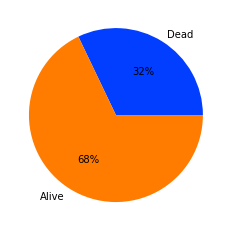

In [154]:
# Check target composition
palette_color = sns.color_palette('bright') # Define color palette

# DEATH_EVENT column composition
data = ['Dead','Alive']
freq = [df.DEATH_EVENT[df['DEATH_EVENT'] == 1].value_counts().sum() , df.DEATH_EVENT[df['DEATH_EVENT'] == 0].value_counts().sum()]
plt.pie(freq, labels=data, colors=palette_color, autopct='%.0f%%')
plt.show()

Statement :<br>
Number of people who die from heart attacks is less than the number of people who don't. Even so, there is no data imbalance in target column.

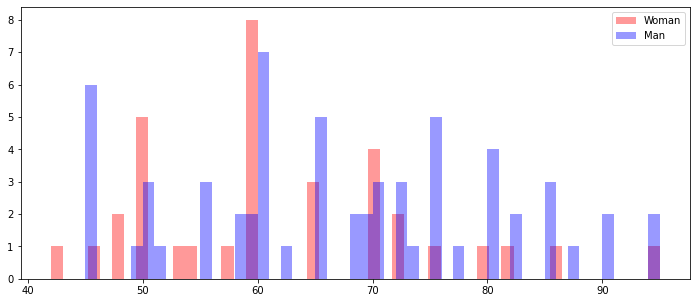

In [155]:
# Check the age composition compared to death event with sex as mediator

# Histogram
df_woman = df[df['sex'] == 0]
df_man = df[df['sex'] == 1]
fig = plt.figure(figsize = (12, 5))
plt.hist(df_woman[df_woman['DEATH_EVENT'] == 1].age, bins = 50, alpha = 0.40, color = 'red')
plt.hist(df_man[df_man['DEATH_EVENT'] == 1].age, bins = 50, alpha = 0.40, color = 'blue')
plt.legend(['Woman','Man'])
plt.show()

Text(0.5, 1.0, 'Man')

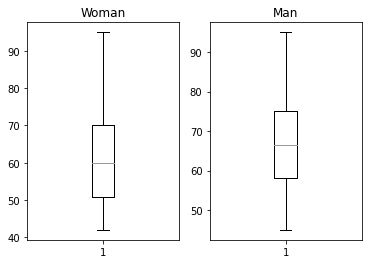

In [156]:
# Boxplot
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(df_woman[df_woman['DEATH_EVENT'] == 1].age)
axs[0].set_title('Woman')
axs[1].boxplot(df_man[df_man['DEATH_EVENT'] == 1].age)
axs[1].set_title('Man')

Statement :<br>
Women have a tendency to die from heart attacks at a younger age than men.<br>
The histogram shows that under the age of 60, women have a higher number of deaths from heart attacks. While over 60 years of age shows the opposite, as well as boxplot.

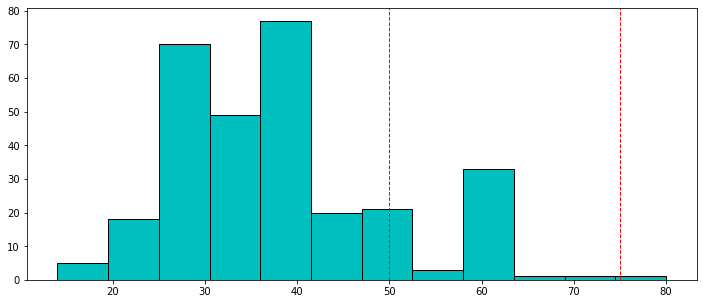

In [157]:
# Plot ejection fraction
fig = plt.figure(figsize = (12, 5))
plt.hist(df['ejection_fraction'], bins = 12, color='c', edgecolor='k')
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(75, color='red', linestyle='dashed', linewidth=1)

Statement :<br>
With red dashed line showing the normal range of ejection fraction level in healthy people, most of the people who have had a heart attack show that most of them have their ejection fraction far below than the normal range threshold.

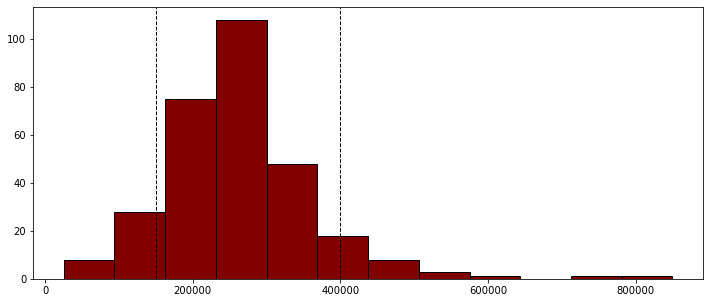

In [158]:
# Plot platelets
fig = plt.figure(figsize = (12, 5))
plt.hist(df['platelets'], bins = 12, color='maroon', edgecolor='k')
plt.axvline(150000, color='k', linestyle='dashed', linewidth=1)
plt.axvline(400000, color='k', linestyle='dashed', linewidth=1)

Statement :<br>
Same as before, where dashed line showing the normal range of platelets in healthy people. Most of the people who have had a heart attack show that most of them have their platelets number in a good range same as healthy people.

### 4. Data Preprocessing

In [159]:
# Split train test set with Inference Model
data_inf = df.sample(10, random_state = 1)

# Remove Inference Model from dataset
data_train_test = df.drop(data_inf.index)

# Reset index for both dataset
data_train_test.reset_index(drop = True , inplace = True)
data_inf.reset_index(drop = True , inplace = True)

In [160]:
# Split data features and target
X = data_train_test.drop('DEATH_EVENT', axis = 1)
y = pd.DataFrame(data_train_test['DEATH_EVENT'])

# Split data train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1) # 20% data will be used as test set

In [161]:
# Check all numerical data outliers

# Define a function for Skewed distribution outliers lower and upper limit
def Skew_LLUL(df, variable, multiplier = 1.5):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - multiplier * IQR
    UL = Q3 + multiplier * IQR
    return LL, UL

# Define a function for Normal distribution outliers lower and upper limit
def Nor_LLUL(df, variable):
    LL = df[variable].mean() - 3 * df[variable].std() # Lower Limit
    UL = df[variable].mean() + 3 * df[variable].std() # Upper Limit
    return LL, UL

# Show outliers dataframe
def Show_LLUL(df, variable, LL, UL):
    out_only = df[(df[variable] > UL) | (df[variable] < LL)]
    print(len(out_only) / len(df) * 100, '% of overall data is considered as outliers')
    return out_only

In [162]:
# Calculate lower and upper limits for every numerical columns

# Normal distribution columns
age_LL, age_UL = Nor_LLUL(X_train, 'age')
time_LL, time_UL = Nor_LLUL(X_train, 'time')

# Extreme Skewed distribution columns
creatinine_phosphokinase_LL, creatinine_phosphokinase_UL = Skew_LLUL(X_train, 'creatinine_phosphokinase', 3)
serum_creatinine_LL, serum_creatinine_UL = Skew_LLUL(X_train, 'serum_creatinine', 3)

# Skewed distribution columns
ejection_fraction_LL, ejection_fraction_UL = Skew_LLUL(X_train, 'ejection_fraction')
platelets_LL, platelets_UL = Skew_LLUL(X_train, 'platelets')

In [163]:
# Showing age column outliers
Show_LLUL(X_train, 'age', age_LL, age_UL)

0.0 % of overall data is considered as outliers


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time


Statement :<br>
No outliers need to be handled.

In [164]:
# Showing time column outliers
Show_LLUL(X_train, 'time', time_LL, time_UL)

0.0 % of overall data is considered as outliers


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time


Statement :<br>
No outliers need to be handled.

In [165]:
# Showing ejection_fraction column outliers
Show_LLUL(X_train, 'ejection_fraction', ejection_fraction_LL, ejection_fraction_UL)

0.8658008658008658 % of overall data is considered as outliers


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
101,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63
100,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196


Statement :<br>
The highest number is 80, but it's still considered as natural outliers.<br>
Source : https://www.texasheart.org/heart-health/heart-information-center/frequently-asked-patient-questions/is-80-ef-good-or-dangerous/

In [166]:
# Showing platelets column outliers
Show_LLUL(X_train, 'platelets', platelets_LL, platelets_UL)

6.0606060606060606 % of overall data is considered as outliers


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
97,45.0,0,2060,1,60,0,742000.0,0.80,138,0,0,278
82,45.0,0,582,1,55,0,543000.0,1.00,132,0,0,250
217,70.0,0,582,1,38,0,25100.0,1.10,140,1,0,246
36,70.0,0,81,1,35,1,533000.0,1.30,139,0,0,212
259,82.0,1,379,0,50,0,47000.0,1.30,136,1,0,13
20,72.0,1,328,0,30,1,621000.0,1.70,138,0,1,88
267,78.0,0,224,0,50,0,481000.0,1.40,138,1,1,192
149,95.0,1,371,0,30,0,461000.0,2.00,132,1,0,50
240,70.0,0,582,0,40,0,51000.0,2.70,136,1,1,250
125,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67


Statement :<br>
The value of data outliers is still a normal value for typical human body range.<br>
It may leads to another disease yet still a make sense number.
Therefore, I can consider them as natural outliers.<br>
Source : https://www.urmc.rochester.edu/encyclopedia/content.aspx?ContentTypeID=160&ContentID=36

In [167]:
# Showing creatinine_phosphokinase column outliers
Show_LLUL(X_train, 'creatinine_phosphokinase', creatinine_phosphokinase_LL, creatinine_phosphokinase_UL)

5.194805194805195 % of overall data is considered as outliers


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
221,45.0,0,2413,0,38,0,140000.00,1.40,140,1,1,280
172,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72
232,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146
98,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43
97,45.0,0,2060,1,60,0,742000.00,0.80,138,0,0,278
148,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30
190,55.0,1,2794,0,35,1,141000.00,1.00,140,1,0,206
32,50.0,1,2334,1,35,0,75000.00,0.90,142,0,0,126
64,60.0,1,2281,1,40,0,283000.00,1.00,141,0,0,187
26,50.0,0,2522,0,30,1,404000.00,0.50,139,0,0,214


In [168]:
# Showing serum_creatinine column outliers
Show_LLUL(X_train, 'serum_creatinine', serum_creatinine_LL, serum_creatinine_UL)

5.194805194805195 % of overall data is considered as outliers


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
112,60.0,0,68,0,20,0,119000.00,2.9,127,1,1,64
244,85.0,0,23,0,45,0,360000.00,3.0,132,1,0,28
98,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43
199,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10
228,60.0,0,582,0,40,0,217000.00,3.7,134,1,0,96
166,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10
165,42.0,0,64,0,30,0,215000.00,3.8,128,1,1,250
100,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196
250,60.0,1,1082,1,45,0,250000.00,6.1,131,1,0,107
41,60.0,0,235,1,38,0,329000.00,3.0,142,0,0,30


Statement :<br>
Since CPK is far beyond the normal range, but their number of outliers is quite high ( over 5% than the data population ), therefore capping method will be performed to handling the outliers as well as in serum_creatinine column.

In [169]:
# Making function for winsorizer
winsoriser = Winsorizer(capping_method='iqr', tail = 'right', fold = 3)
CPK_SC = ['creatinine_phosphokinase' , 'serum_creatinine']
df_CPK_SC = X_train[CPK_SC]

# Model learning the data distribution
winsoriser.fit(df_CPK_SC)

# Make a new dataframe with pay_amt_... data that has been capped
CPK_SC_capped = winsoriser.transform(df_CPK_SC)

In [170]:
# Compare the CPK and serum creatinine distribution before and after being capped
print('Before capping')
print(X_train[CPK_SC].skew())
print('After capping')
print(CPK_SC_capped.skew())

Before capping
creatinine_phosphokinase    3.695482
serum_creatinine            4.594511
dtype: float64
After capping
creatinine_phosphokinase    1.871947
serum_creatinine            1.560992
dtype: float64


In [171]:
# Combine the capped column with main dataframe
X_train = X_train.drop(CPK_SC, axis = 1)
X_train_new = pd.merge(X_train, CPK_SC_capped, left_index=True, right_index=True)

In [172]:
# Split the train test set based on their categories
X_train_num = X_train_new[num_raw]
X_train_cat = X_train_new[cat_raw]
X_test_num = X_test[num_raw]
X_test_cat = X_test[cat_raw]

In [173]:
# Feature selection
# Calculate numerical and categorical significance level using ANOVA
select_ANOV = SelectKBest(score_func = f_classif, k = 6)
num_list = select_ANOV.fit(X_train_num, y_train)
num_result = pd.Series(num_list.scores_)
num_result.index = X_train_num.columns
num_result.sort_values(ascending = False)

time                        93.329489
serum_creatinine            54.186159
age                         24.865312
ejection_fraction           15.695294
platelets                    2.120394
creatinine_phosphokinase     0.757744
dtype: float64

Statement :<br>
time, serum_creatinine, and age will be selected as numerical features.

In [174]:
# Count dependency between 2 encoded categorical columns using Chi2
select_chi2 = SelectKBest(score_func = chi2, k = 5)
cat_list = select_chi2.fit(X_train_cat, y_train)
cat_result = pd.Series(cat_list.scores_)
cat_result.index = X_train_cat.columns
cat_result.sort_values(ascending = False)

anaemia                2.415846
high_blood_pressure    1.696678
diabetes               0.190136
sex                    0.066618
smoking                0.009340
dtype: float64

Statement :<br>
anaemia and high_blood_pressure will be selected as categorical features.

In [175]:
# Check new train set distribution for scaling
X_train_new[num_raw].skew()

age                         0.400560
creatinine_phosphokinase    1.871947
ejection_fraction           0.572618
platelets                   0.977260
serum_creatinine            1.560992
time                        0.105809
dtype: float64

Statement :<br>
Every column with normal distribution will be standarize using StandardScaler, while the skewed distribution will be Normalized using MinMaxScaler.<br>
Skewness value over than 0.5 will be cosidered as skewed distribution.<br>
Normal distribution : age, time<br>
Skewed distribution : creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine


In [176]:
# Make list for selected features
num_nor = ['age','time'] # Numerical features with normal distributin
num_skew = ['serum_creatinine'] # Numerical features with skewed distributin
cat_final = ['anaemia' , 'high_blood_pressure'] # Categorical features

In [177]:
# Scaling the numerical columns
# Train set
X_train_num_nor = X_train_new[num_nor]
X_train_num_skew = X_train_new[num_skew]
X_train_cat_final = X_train_new[cat_final]

# Test set
X_test_num_nor = X_test[num_nor]
X_test_num_skew = X_test[num_skew]
X_test_cat_final = X_test[cat_final]

# Define the scaler function
nor_scaler = StandardScaler()
skew_scaler = MinMaxScaler()

# Learn the numerical columns distribution in train set for scaling
nor_scaler.fit(X_train_num_nor)
skew_scaler.fit(X_train_num_skew)

# Scaled the numerical columns by train set scale
# Train set
X_train_num_nor_scaled = nor_scaler.transform(X_train_num_nor)
X_train_num_skew_scaled = skew_scaler.transform(X_train_num_skew)

# Test set
X_test_num_nor_scaled = nor_scaler.transform(X_test_num_nor)
X_test_num_skew_scaled = skew_scaler.transform(X_test_num_skew)

In [178]:
# Combine the scaled data
columns_all = np.concatenate([num_nor, num_skew, cat_final])
X_train_final = np.concatenate([X_train_num_nor_scaled, X_train_num_skew_scaled, X_train_cat_final], axis=1)
X_test_final = np.concatenate([X_test_num_nor_scaled, X_test_num_skew_scaled, X_test_cat_final], axis=1)
X_train = pd.DataFrame(X_train_final, columns = columns_all)
X_test = pd.DataFrame(X_test_final, columns = columns_all)

### 5. Model Definition

In [179]:
# Defining the model with base parameters
RF_Classifier = RandomForestClassifier(random_state = 1)
AB_Classifier = AdaBoostClassifier(random_state = 1)

Statement : <br>
Since hyperparameters tunning isn't required, therefore the model will be using base parameters. Except the random_state, in order to keep the model results consistent.

### 6. Model Training

In [180]:
# Model training
RF_Classifier.fit(X_train, y_train)
AB_Classifier.fit(X_train, y_train)

# Model's predict result
# Train set
y_train_pred_RF = RF_Classifier.predict(X_train)
y_train_pred_AB = AB_Classifier.predict(X_train)

# Test set
y_test_pred_RF = RF_Classifier.predict(X_test)
y_test_pred_AB = AB_Classifier.predict(X_test)

### 7. Model Evaluation

In [181]:
# Check the best model score reports

# Random Forest Report
print('Random Forest Report \n Train Set')
print(classification_report(y_train, y_train_pred_RF))
print('Test Set')
print(classification_report(y_test, y_test_pred_RF))

Random Forest Report 
 Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        74

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

Test Set
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.75      0.57      0.65        21

    accuracy                           0.78        58
   macro avg       0.77      0.73      0.74        58
weighted avg       0.77      0.78      0.77        58



In [182]:
# AdaBoost Report
print('AdaBoost Report \n Train Set')
print(classification_report(y_train, y_train_pred_AB))
print('Test Set')
print(classification_report(y_test, y_test_pred_AB))

AdaBoost Report 
 Train Set
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       157
           1       0.89      0.85      0.87        74

    accuracy                           0.92       231
   macro avg       0.91      0.90      0.90       231
weighted avg       0.92      0.92      0.92       231

Test Set
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        37
           1       0.76      0.76      0.76        21

    accuracy                           0.83        58
   macro avg       0.81      0.81      0.81        58
weighted avg       0.83      0.83      0.83        58



In [183]:
# Check roc_auc score
y_RF_train_proba = RF_Classifier.predict_proba(X_train)[:, 1]
y_RF_test_proba = RF_Classifier.predict_proba(X_test)[:, 1]
y_AB_train_proba = AB_Classifier.predict_proba(X_train)[:, 1]
y_AB_test_proba = AB_Classifier.predict_proba(X_test)[:, 1]

auc_RF_train = roc_auc_score(y_train, y_RF_train_proba)
auc_AB_train = roc_auc_score(y_train, y_AB_train_proba)
auc_RF_test = roc_auc_score(y_test, y_RF_test_proba)
auc_AB_test = roc_auc_score(y_test, y_AB_test_proba)

print('Random Forest Tunned Model AUC - Train :', auc_RF_train)
print('Random Forest Tunned Model AUC - Test :', auc_RF_test)
print('Gradient Boost Base Model AUC - Train :', auc_AB_train)
print('Gradient Boost Base Model AUC - Test :', auc_AB_test)

Random Forest Tunned Model AUC - Train : 1.0
Random Forest Tunned Model AUC - Test : 0.8893178893178892
Gradient Boost Base Model AUC - Train : 0.9850232398003098
Gradient Boost Base Model AUC - Test : 0.879021879021879


Random Forest Train set Confusion Matrix


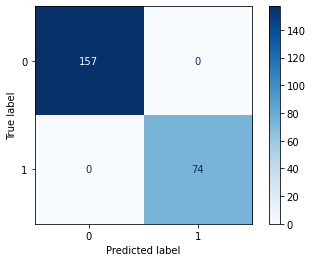

In [184]:
# Random Forest Confusion Matrix Train Set
print('Random Forest Train set Confusion Matrix')
disp = plot_confusion_matrix(RF_Classifier, X_train, y_train, cmap='Blues')

Random Forest Test set Confusion Matrix


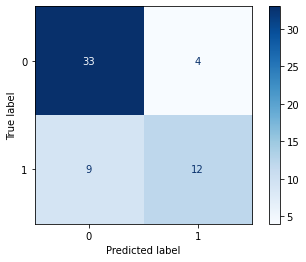

In [185]:
# Random Forest Confusion Matrix Test Set
print('Random Forest Test set Confusion Matrix')
disp = plot_confusion_matrix(RF_Classifier, X_test, y_test, cmap='Blues')

AdaBoost Train set Confusion Matrix


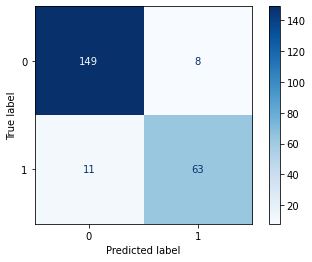

In [186]:
# AdaBoost Confusion Matrix Train Set
print('AdaBoost Train set Confusion Matrix')
disp = plot_confusion_matrix(AB_Classifier, X_train, y_train, cmap='Blues')

AdaBoost Test set Confusion Matrix


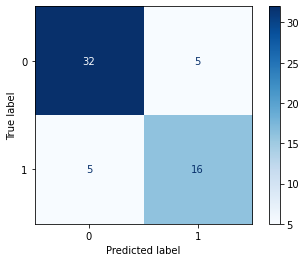

In [187]:
# AdaBoost Confusion Matrix Test Set
print('AdaBoost Test set Confusion Matrix')
disp = plot_confusion_matrix(AB_Classifier, X_test, y_test, cmap='Blues')

Statement :<br>
1. From classification report, we can see that Random Forest Precision and Accuracy is magnificent in test set yet another story in test set. It is still a high score but since the gap between train and test set is enourmost ( over than 10% ), therefore I conclude that Random Forest is actually suffering from overfitting. The same case happens in AdaBoost train and test set.
2. Same things happen in roc auc score, where both of models is actually able to differentiate the target greatly. But since the gap between train and test scores is so big ( over than 10% ), both of models is actually suffering from overfiting.
3. Both of model's confusion matrix prove the model's ability to predict very well.

### 8. Model Inference

In [188]:
# Split Inference Data to different type
inf_num_nor = data_inf[num_nor]
inf_num_skew = data_inf[num_skew]
inf_cat_final = data_inf[cat_final]

# Scale the Inference Data
inf_num_nor_scaled = nor_scaler.transform(inf_num_nor)
inf_num_skew_scaled = skew_scaler.transform(inf_num_skew)

# Combine the scaled data
inf_final = np.concatenate([inf_num_nor_scaled, inf_num_skew_scaled, inf_cat_final], axis=1)
inf_data = pd.DataFrame(inf_final, columns = columns_all)

# Predict Inference Model using both models
RF_inf_predict = pd.DataFrame(RF_Classifier.predict(inf_data), columns = ['DEATH_EVENT Random Forest'])
AB_inf_predict = pd.DataFrame(AB_Classifier.predict(inf_data), columns = ['DEATH_EVENT AdaBoost'])

pd.concat([inf_data, RF_inf_predict, AB_inf_predict], axis = 1)

,age,time,serum_creatinine,anaemia,high_blood_pressure,DEATH_EVENT Random Forest,DEATH_EVENT AdaBoost
0,0.730503,-1.007807,0.916667,1.0,0.0,1,1
1,-0.703123,-0.336420,0.083333,1.0,1.0,0,0
2,-1.377770,1.445337,0.166667,0.0,0.0,0,0
3,-0.534461,1.057999,0.250000,0.0,0.0,0,0
4,1.152158,-0.749581,0.041667,1.0,1.0,0,1
5,-1.799425,0.993442,0.166667,1.0,0.0,0,0
6,-0.871785,-0.685025,0.083333,0.0,0.0,0,0
7,-1.293439,-0.323509,0.283333,0.0,1.0,0,0
8,-0.956116,1.471160,0.083333,1.0,0.0,0,0
9,-1.799425,1.445337,0.208333,0.0,0.0,0,0


## Conclusions, Assumptions, Overall Analysis
1. columns that affect DEATH_EVENT significantly are age, time, serum_creatinine, anaemia, and high_blood_pressure. But since few of them were manipulated using capping methods, using a different methods or not manipulating at all may gives a different results.
2. Neither Random Forest nor AdaBoost were event a goodfit model, I can't say which one is better since both scores gap for every scoring methods between train and test set are big.
3. Both of models is able to predict with high accuracy, but since the difference between train and test set ( even though they show a very high accuracy on both set ) both models can not be called good.
4. Perform hyperparameter tuning for each models may help improve the model performance and even reduce the gap for every scoring methods between train and test set. Using a larger dataset will improve the model performance since the dataset is relatively small.